In [4]:
import matplotlib.pyplot as plt

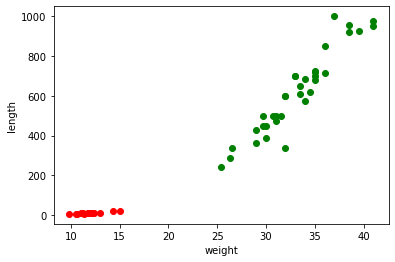

In [5]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
plt.scatter(smelt_length, smelt_weight, color="r")
plt.scatter(bream_length, bream_weight, color='g')
plt.xlabel("weight")
plt.ylabel("length")
plt.show()

In [6]:
length = bream_length + smelt_length #numpy로 +를 하면 행렬연산을 함
weight = bream_weight + smelt_weight

# zip() ; 동일한 개수로 이루어진 자료형을 묶어 주는 역할을 하는 함수
fish_data = [[l, w] for l, w in zip(length, weight)]

In [7]:
#정답을 가르기 위해 도미에 해당하는 것은 1 빙어는 0 으로 설정
fish_target = [1] * 35 + [0] * 14
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [8]:
# Train을 하기위함 -> 모델을 만들겠다는 것
from sklearn.neighbors import KNeighborsClassifier 

In [9]:
kn = KNeighborsClassifier() #kn에 해당하는 class를 복사하여 동일한 기능을 하도록 한다는 것
# 모델 생성
kn.fit(fish_data, fish_target) # fish_data에 분류된 빙어와 도미가 있음, fish_target에는 도미면 1, 빙어면 0 이 되도록 되어있음

kn.score(fish_data, fish_target) #특정 데이터가 들어오면 근처 데이터 중 가까운것을 골라서 선택, 원래는 Train data를 넣어줘야함

1.0

In [10]:
kn.predict([[30, 600]]) 
#새로운 데이터에 정답을 예측 ; 2차원 list로 전달해야함
#도미에 해당하는 반환값 1이 나옴

array([1])

In [11]:
print(kn._fit_X) #train data의 x값이 어떤건지 확인 _fit_X

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [12]:
print(kn._y) #train data의 y값이 어떤건지 확인, _y

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [13]:
#근처 데이터 49개를 비교한다는 것 ; default는 5이다
kn49 = KNeighborsClassifier(n_neighbors=49)

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [14]:
kn49.predict([[10, 7]]) #비교데이터를 전체로 둬서 빙어 데이터라도 도미데이터를 반환[1]

array([1])

## 샘플링 편향

In [15]:
# 훈련세트 설정 ; 35번째 까지는 도미 데이터
train_input = fish_data[:35] # 훈련 세트로 입력값 중 0~34번째 인덱스 사용
train_target = fish_target[:35] # 훈련 세트로 타깃값 중 0~34번째 인덱스 사용

In [16]:
# 테스트 세트 설정 ; 35번째 부터는 빙어 데이터임
test_input = fish_data[35:] #테스트 세트로 입력값 중 35번째부터 마지막까지 인덱스 사용
test_target = fish_target[35:] #테스트 세트로 타깃값 중 35번째부터 마지막까지 인덱스 사용

In [17]:
kn = kn.fit(train_input, train_target) #훈련세트에 도미만 있어서 잘못된 데이터 세트임

kn.score(test_input, test_target) #테스트 데이터가 fit의 훈련데이터에 몇개가 맞았느냐를 score로 나타내줌

0.0

In [18]:
import numpy as np

In [19]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr)
print(input_arr.shape) #49행 2열

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)


## 편향된 데이터를 랜덤화 시킴(대신 모두가 같은 결과가 나오도록 랜덤화)

In [20]:
np.random.seed(42) #42에 해당하는 랜덤화 규칙이 있음, 42를 쓰는 사람들은 동일한 랜덤화된 값이 나옴
#seed를 정하면 정한순간 모든 랜덤관련된 함수들이 seed에 따라 적용됨
index = np.arange(49)

print(index) #shuffle을 쓰기전까진 그대로 나옴]

np.random.shuffle(index) #randint를 써도 동일한 기능을 함
print(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [21]:

#input_arr = np.array(fish_data) , target_arr = np.array(fish_target) input_arr과 target_arr을 이렇게 만들어 놓은 상태임

#훈련 data
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(input_arr[13], train_input[0])

#테스트 data
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

[ 32. 340.] [ 32. 340.]


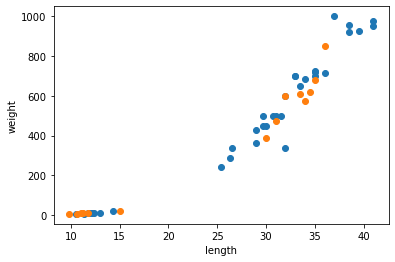

In [22]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [24]:
kn.predict(test_input) #predict는 정답이 아닌 내가 낸 답안지이다.(정답은 test_target)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [25]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])